# Homework #1

**See Canvas for the due date of this assignment**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class [scanning policy](https://docs.google.com/document/d/1d_7PJvTGtMGtHWq8BezaTzYI5aYZkFgmchV_hTId6Ks/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


In [1]:
library(testthat)

## A. Theoretical Problems

###  A.1: Connections between linear algebra and statistics


Let $\mathbf{a} = (a_1,...,a_n)^T$ and $\mathbf{y} = (y_1,...,y_n)^T$ be two vectors. Define the *inner product* of $\mathbf{a}$ and $\mathbf{y}$ to be $\mathbf{a}^T\mathbf{y} = a_1y_1 + a_2y_2 + ... + a_ny_n$. 

**A.1 (a) [5 points] Interpret  $\mathbf{y}$ as a set of observations of a variable. Find $\mathbf{a}$ such that $\mathbf{a}^T\mathbf{y}$ is equal to the sample mean of $\mathbf{y}$, i.e., $\bar{y}$.**

Let $\mathbf{a} = (1/n, ..., 1/n)^T$. Then $\mathbf{a}^T\mathbf{y} = (1/n)y_1 + (1/n)y_2 + ... + (1/n)y_n = \frac{1}{n}\sum^n_{i=1}y_i$.

Recall that the sample variance of data $\mathbf{y} = (y_1,...,y_n)^T$ is defined as 

\begin{align*}
s_y^2 = \frac{1}{n-1}\sum^n_{i=1}\left(y_i - \bar{y} \right)^2
\end{align*}

**A.1 (b) [7 points] Define $\mathbf{\bar{y}} = (\bar{y},..., \bar{y})^T$ (that is, $\mathbf{\bar{y}}$ is a vector where every entry is the sample mean of $\mathbf{y}$). Show that $(\mathbf{y} - \mathbf{\bar{y}})^T(\mathbf{y} - \mathbf{\bar{y}}) = (n-1)s_y^2$**

First, note that $\mathbf{y} - \mathbf{\bar{y}} = (y_1 - \bar{y} , \, y_2 - \bar{y} \, ,..., \, y_n - \bar{y})^T$. So, 

\begin{align*}
(\mathbf{y} - \mathbf{\bar{y}})^T(\mathbf{y} - \mathbf{\bar{y}}) = (y_1 - \bar{y} , \, y_2 - \bar{y} \, ,..., \, y_n - \bar{y})\begin{pmatrix}
           y_1 - \bar{y} \\
           y_2 - \bar{y} \\
           \vdots \\
           y_n - \bar{y}
         \end{pmatrix} = (y_1 - \bar{y})^2 + (y_2 - \bar{y})^2 + ... + (y_2 - \bar{y})^2 = \sum^n_{i=1}\left(y_i - \bar{y} \right)^2 = (n-1) s_y^2 
\end{align*}

### A.2 Linear regression with matrices and vectors

**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors will play an important role for us in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j x_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $x_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable, often assumed to be $N(0, \sigma^2)$. 
5. $\beta_j$, $j = 0,...,p$ are *unknown parameters* of the model. We hope to estimate these, which would help us characterize the relationship between the predictors and response.

**A.2.(a) [5 points] Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. (This is more LaTeX practice than anything else...)**


$$\mathbf{Y} = X\mathbf{\beta} + \mathbf{\varepsilon},$$ 

where $\mathbf{Y} = (Y_1,...,Y_n)^T$,  $\,\,\,\,X = \begin{bmatrix}
1 & X_{1,1} & X_{1,2} & ... & X_{1,p}\\
1 & X_{2,1} & X_{2,2} & ... & X_{2,p} \\
\vdots & \vdots & \vdots & ... & \vdots \\
1 & X_{n,1} & X_{n,2} & ... & X_{n,p} 
\end{bmatrix}, \,\, $ $\boldsymbol{\beta} = (\beta_1,...,\beta_n)^T$ and $\boldsymbol{\varepsilon} = (\varepsilon_1,...,\varepsilon_n)^T$

**A.2.(b) [8 points] In class, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$.**


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 
2. What does this condition mean in practical terms? 
3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?
4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?




1. For $X^TX$ to be invertible, the columns of $X$ must be linearly independent. That means that no column of $X$--i.e., no measured predictor--can be written as a linear combination of other columns. This implies that $n > (p+1)$.
2. If we've measured a predictor that is simply a linear combination of others, that means that that predictor is not adding any new information that's not already contained in the other predictors. Imagine a simple case: $X_1$ is a predictor of measured weights in pounds, and $X_2$ is a predictor of measured weights in kilograms. Thus, $X_1 = 2.2046 X_2$. Measuring $X_1$ doesn't give any new information.
3. This implies that we have more parameters than data/measurements, and thus $X^TX$ will not be invertible.
4. The formula for $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$ is derived from the "normal equations": $$ (X^TX)\mathbf{\beta} = X^T\mathbf{Y}.$$ The normal equations have a unique solutions if and only if $X^TX$ is invertible. If it's not invertible, then either the normal equations have no solutions or infinitely many solutions.

### A.3 More linear algebra and regression!

In class, we defined the *hat* or *projection* matrix as 

$$H = X(X^TX)^{-1}X^T.$$

The goal of this question is to use the hat matrix to prove that the fitted values, $\widehat{\mathbf Y}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$, are uncorrelated. We will do it in steps, and *some* of the proofs will only be required for STAT 5010 students. Note that STAT 4010 students are asked to answer part (e), as to why this result has practical importance.

**A.3 (a) [8 points] Show that $\widehat{Y} = HY$. That is, $H$ "puts a hat on" $Y$.**

$\widehat{Y} = X\widehat{\boldsymbol\beta} = X(X^TX)^{-1}X^T\mathbf{Y} = H\mathbf{Y}$

**A.3 (b) [9 points] Show that $H$ is symmetric: $H = H^T$.**

$H^T = \big(X(X^TX)^{-1}X^T \big)^T = (X^T)^T\big[(X^TX)^{-1}\big]^TX^T = X\big[(X^TX)^{T}\big]^{-1}X^T = X(X^TX)^{-1}X^T = H$

**A.3 (c) (STAT 5010 Only) [4 points] Show that $H(I_n - H) = 0_n$, where $0_n$ is the zero matrix of size $n \times n$.**

Note that 

$$HH =  \bigg(X(X^TX)^{-1}X^T\bigg)\bigg(X(X^TX)^{-1}X^T\bigg) = X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T = X(X^TX)^{-1}X^T = H,$$ because $ (X^TX)^{-1}X^TX = I_{p+1}$.

Thus, 
$H(I_n - H) = HI_n - HH = H - H = 0_n$

**A.3 (d) (STAT 5010 Only)  [4 points] Stating that $\widehat{\mathbf Y}$ is uncorrelated with $\widehat{\boldsymbol\varepsilon}$ is equivalent to showing that these vectors are orthogonal. That is, we need to show that their dot product is zero:**

$$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$$ **Prove this result.**

It's intersting to think about why uncorrelated, in this case, is equivalent to orthogonal. Extra credit if you can tell me why!

$$\widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = (H\mathbf Y)^T(I-H)\mathbf Y = \mathbf Y^TH^T(I_n-H)Y = \mathbf Y^TH(I_n-H)Y = \mathbf Y^T0_nY = 0.$$

**A.3 (e) (STAT 5010 Only) [2 points] Why is this result important in the practical use of linear regression?**

This result shows that, if the linear regression assumptions are met, then there should be no correlation between the fitted values, $\widehat{\mathbf{Y}}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$. Thus, it may give us a way to check some of our model assumptions. For example, if we plot the residuals against the fitted values and see a trend, we might conclude that some model assumption is incorrect (we will learn more about "regression diagnostics" in a later unit).

## B. Computational Problems

###  B.1 Exploratory data analysis and basic regression

**B.1.(a) Load the "gala" dataset, and describe the variables.**

In [10]:
#gala = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/gala.txt", sep = "\t")
gala = read.csv(url(paste0("https://raw.githubusercontent.com/bzaharatos/",
                           "-Statistical-Modeling-for-Data-Science-Applications/",
                           "master/Modern%20Regression%20Analysis%20/Datasets/gala.csv")), sep = ",")
gala = gala[,-1]
summary(gala)

    Species          Endemics          Area            Elevation      
 Min.   :  2.00   Min.   : 0.00   Min.   :   0.010   Min.   :  25.00  
 1st Qu.: 13.00   1st Qu.: 7.25   1st Qu.:   0.258   1st Qu.:  97.75  
 Median : 42.00   Median :18.00   Median :   2.590   Median : 192.00  
 Mean   : 85.23   Mean   :26.10   Mean   : 261.709   Mean   : 368.03  
 3rd Qu.: 96.00   3rd Qu.:32.25   3rd Qu.:  59.237   3rd Qu.: 435.25  
 Max.   :444.00   Max.   :95.00   Max.   :4669.320   Max.   :1707.00  
    Nearest          Scruz           Adjacent      
 Min.   : 0.20   Min.   :  0.00   Min.   :   0.03  
 1st Qu.: 0.80   1st Qu.: 11.03   1st Qu.:   0.52  
 Median : 3.05   Median : 46.65   Median :   2.59  
 Mean   :10.06   Mean   : 56.98   Mean   : 261.10  
 3rd Qu.:10.03   3rd Qu.: 81.08   3rd Qu.:  59.24  
 Max.   :47.40   Max.   :290.20   Max.   :4669.32  

**B.1.(b) [8 points] Use ggplot() to explore the relationship between the Species variable (response) and Endemics, Elevation, Nearest, and Adjacent (predictor variables). You might do so by creating four separate scatter plots. Do these relationships look linear? Does the variability in Species change as a function of any of the predictors? Are there any outliers in any of the plots?**

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Species,1.00000000,0.970876516,0.6178431,0.73848666,-0.014094067,-0.17114244,0.02616635
Endemics,0.97087652,1.000000000,0.6169791,0.79290437,0.005994286,-0.15426432,0.08265803
Area,0.61784307,0.616979087,1.0000000,0.75373492,-0.111103196,-0.10078493,0.18003759
Elevation,0.73848666,0.792904369,0.7537349,1.00000000,-0.011076984,-0.01543829,0.53645782
Nearest,-0.01409407,0.005994286,-0.1111032,-0.01107698,1.000000000,0.61541036,-0.11624788
Scruz,-0.17114244,-0.154264319,-0.1007849,-0.01543829,0.615410357,1.00000000,0.05166066
Adjacent,0.02616635,0.082658026,0.1800376,0.53645782,-0.116247885,0.05166066,1.00000000


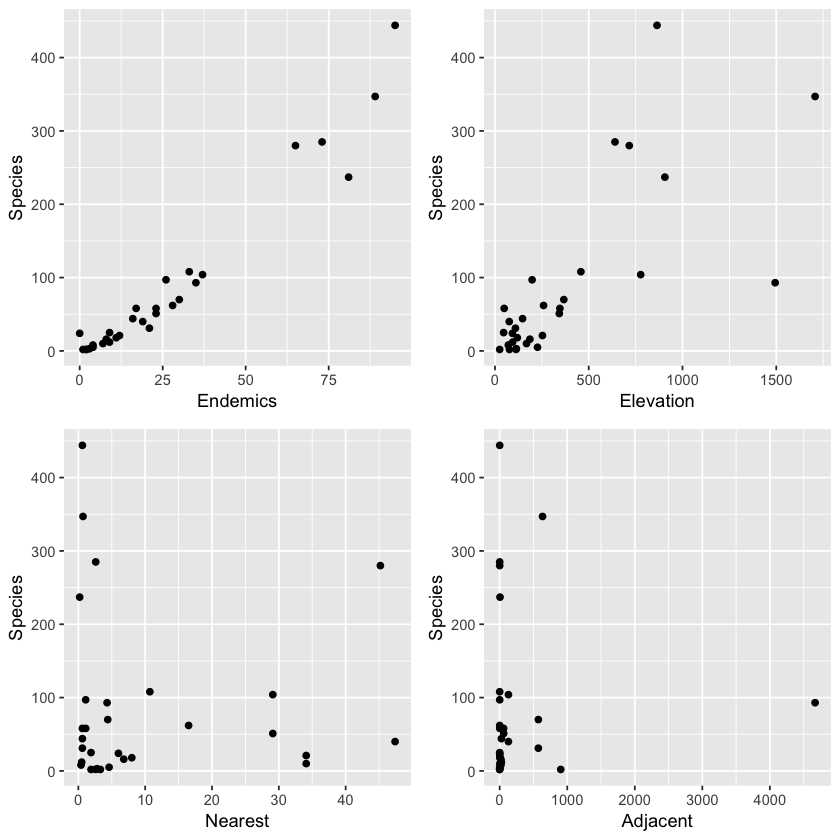

In [9]:
#install.packages("gridExtra")
library(gridExtra)
library(ggplot2)

p = ggplot(data = gala) 
p1 = p + geom_point(mapping = aes(x = Endemics, y = Species)) 
p2 = p + geom_point(mapping = aes(x = Elevation, y = Species))
p3 = p + geom_point(mapping = aes(x = Nearest, y = Species))
p4 = p + geom_point(mapping = aes(x = Adjacent, y = Species))
grid.arrange(p1,p2,p3,p4, nrow = 2)
cor(gala)

1. The Species vs Endemics plot appears to be approximately linear, but perhaps with some curvature.
2. The Species vs Elevation plot appears roughly linear, but there appears to be more variance in Species as Elevation gets higher.
3. The Species vs Nearest plot doesn't appear to have a linear relationship.
4. The Species vs Adjacent plot doesn't appear to have a linear relationship, and there seem to be a few very large outliers.

**B.1.(c) [18 points] Perform a linear regression with Species as the response and Endemics, Elevation, Nearest, and Adjacent as predictors. Store your `lm()` object in the variable `lm_species`. Interpret the parameter estimate associated with Endemics in the markdown cell below (assume, for the moment, that the model is correct, and so the interpretation holds).**

In [4]:
lm_species = lm(Species ~ Endemics + Elevation + Nearest + Adjacent, data = gala)
summary(lm_species)


Call:
lm(formula = Species ~ Endemics + Elevation + Nearest + Adjacent, 
    data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.232 -10.318   3.412   9.521  70.768 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.510039   8.333335  -2.101   0.0459 *  
Endemics      4.192551   0.429056   9.772  5.1e-10 ***
Elevation    -0.008594   0.032903  -0.261   0.7961    
Nearest      -0.203743   0.376472  -0.541   0.5932    
Adjacent     -0.005629   0.009876  -0.570   0.5738    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.59 on 25 degrees of freedom
Multiple R-squared:  0.9464,	Adjusted R-squared:  0.9378 
F-statistic: 110.3 on 4 and 25 DF,  p-value: 1.673e-15


In [5]:
### BEGIN HIDDEN TESTS
lm_species_solution = lm(Species ~ Endemics + Elevation + Nearest + Adjacent, data = gala)

test_that("Is lm_species of type lm?", {expect_is(lm_species, "lm")})
test_that("Is f1 correct?", {expect_equal(coef(lm_species_solution)[1], coef(lm_species)[1])})
### END HIDDEN TESTS

After adjusting for the highest elevation of the island (m), the distance from the nearest island (km), and the area of the adjacent island (square km), if the number of endemic species on that island were increased by one, *on average*, we would see a $\approx 4.19$ increase in the number of plant species found on the island.

(This conclusion sounds causal; but it shouldn't necessarily be interpreted as such!)

**B.1.(d) [16 points] Calculate the residual sum of squares, and the total sum of squares for this model, and store these quantities in `rss` and `tss`, respectively. Then, use these calculations to verify the Multiple R-squared calculation in the summary from the previous part.  Store your $R^2$ for this model in `r2`. Interpret $R^2$ (assume, for the moment, that the model is correct, and so the interpretation holds). Note that the anova table calculates sums of squares. Why doesn't the total sum of squares show up in the table?**

In [6]:
### BEGIN SOLUTION HERE
rss = sum(resid(lm_species)^2)
tss = with(gala, sum((Species - mean(Species))^2))
r2 = 1-rss/tss
cat("The TSS is ", tss, ".")
cat("The RSS is ", rss, ".")
cat("The r2 is ", r2, ".")
### END SOLUTION HERE
anova(lm_species)

The TSS is  381081.4 .The RSS is  20428.8 .The r2 is  0.9463925 .

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Endemics,1,359207.757,359207.7567,439.5849097,2.216488e-17
Elevation,1,1007.135,1007.1351,1.2324939,2.774871e-01
Nearest,1,172.193,172.1930,0.2107233,6.501674e-01
Adjacent,1,265.478,265.4780,0.3248819,5.737755e-01
Residuals,25,20428.804,817.1522,NA,NA


In [7]:
### BEGIN HIDDEN TESTS
rss_solution = sum(resid(lm_species)^2)
tss_solution = with(gala, sum((Species - mean(Species))^2))
r2_solution = 1-rss/tss
test_that("Is rss correct?", {expect_equal(round(rss,2), round(rss_solution,2))})
test_that("Is tss correct?", {expect_equal(round(tss,2), round(tss_solution,2))})
test_that("Is r2 correct?", {expect_equal(round(r2,2), round(r2_solution,2))})
### END HIDDEN TESTS

Assuming that the model is correct, approximately $95\%$ of the variability in `species` can be explained by `Endemics`, `Elevation`, `Nearest`, and `Adjacent`.

Note that the total sum of squares is not in the table because it can easily be calculated from quantities that are: $TSS = RSS + ESS$.

**B.1.(e) [8 points] Plot the residuals vs the fitted values. Based on what we've discussed in class, what do you expect to see in this plot? Do you see what you expect to see? If not, what does that mean?**

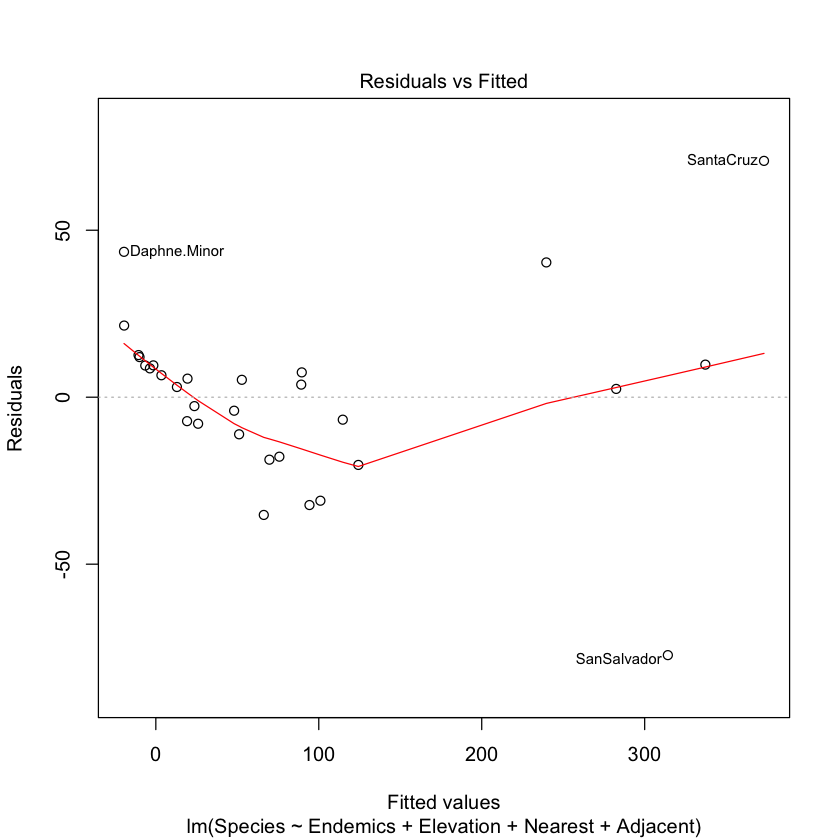

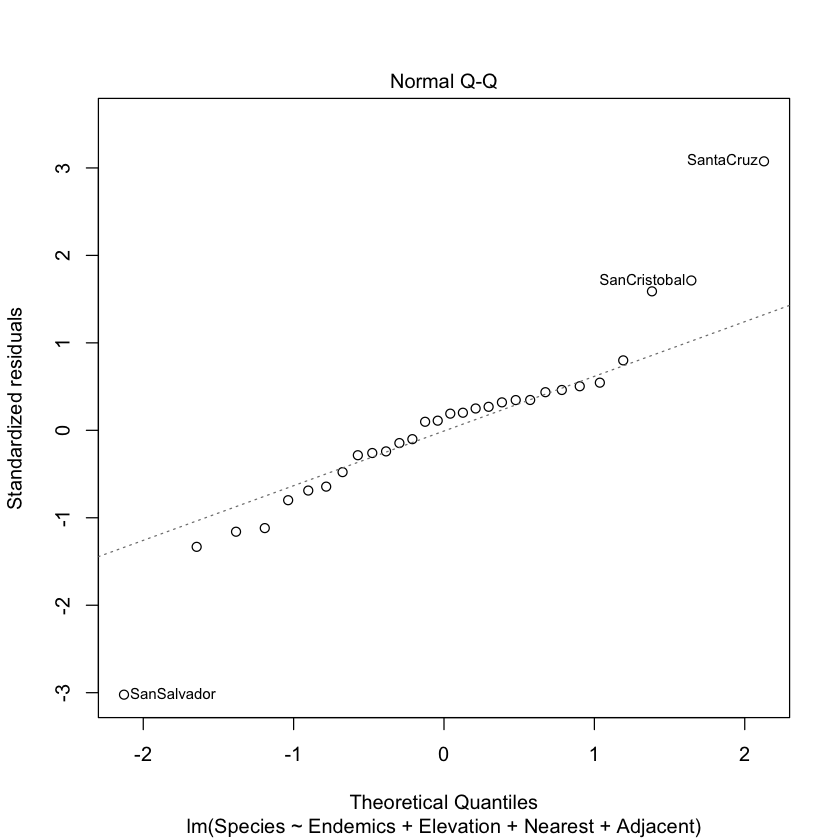

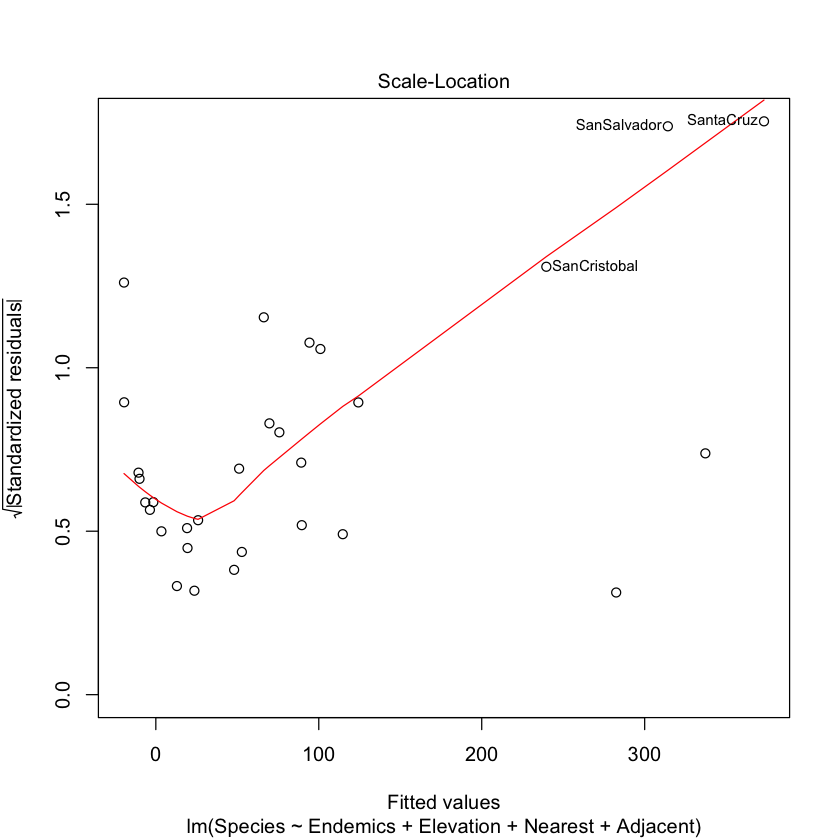

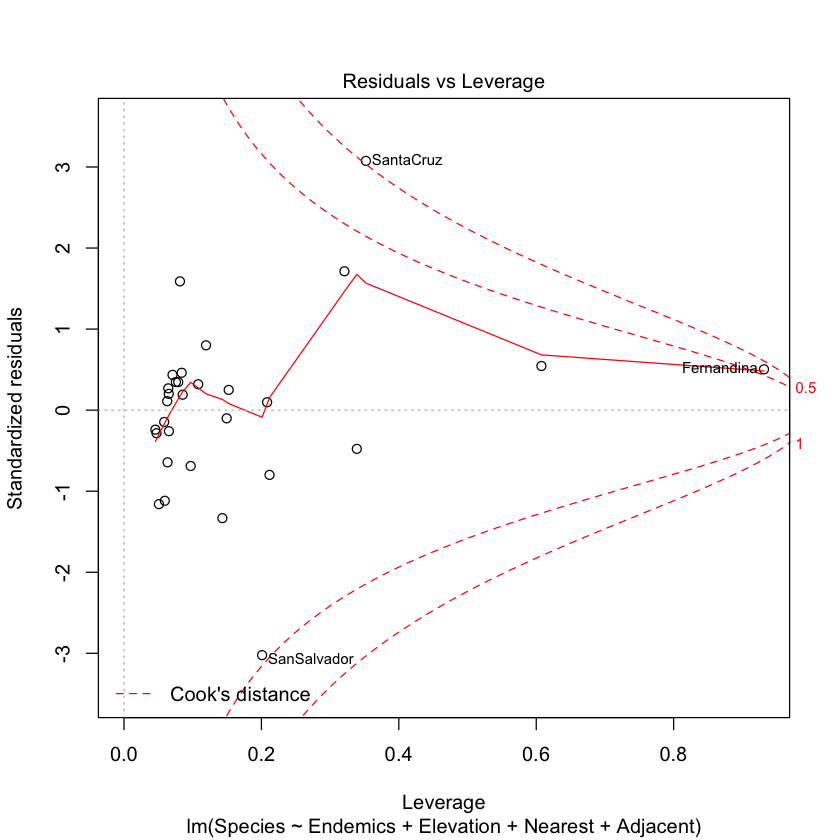

In [8]:
plot(lm_species)

We would expect to see no correlation between the residuals and the fitted values (the first plot above). But there does seem to be a downward linear trend, for small fitted values (and other issues that we'll discuss in unit #4).